In [ ]:
pip install -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sentinelsat import SentinelAPI
from shapely.geometry import Polygon
from shapely.geometry import shape
import geojson
import json
import zipfile

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def get_nga_polygon():
    with open("geoBoundaries-NGA-ADM0_simplified.geojson") as f:
        gj = geojson.load(f)
    polygon: Polygon = shape(gj["features"][0]["geometry"])
    return polygon

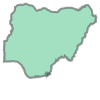

In [ ]:
get_nga_polygon()

In [ ]:
def get_nga_state_polygon(state):
    with open("statesGeoJSON.json") as f:
        gj = json.load(f)
        state = [s for s in gj["features"] if s["properties"]["admin1Name"] == state]
    polygon: Polygon = shape(state[0]["geometry"])
    return polygon

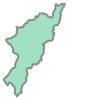

In [ ]:
get_nga_state_polygon("Adamawa")

In [ ]:
NGA_STATES = [
    "Abia",
    "Adamawa",
    "Akwa Ibom",
    "Anambra",
    "Bauchi",
    "Bayelsa",
    "Benue",
    "Borno",
    "Cross River",
    "Delta",
    "Ebonyi",
    "Edo",
    "Ekiti",
    "Enugu",
    "Federal Capital Territory",
    "Gombe",
    "Imo",
    "Jigawa",
    "Kaduna",
    "Kano",
    "Katsina",
    "Kebbi",
    "Kogi",
    "Kwara",
    "Lagos",
    "Nasarawa",
    "Niger",
    "Ogun",
    "Ondo",
    "Osun",
    "Oyo",
    "Plateau",
    "Rivers",
    "Sokoto",
    "Taraba",
    "Yobe",
    "Zamfara",
]

In [ ]:
username = "ajin12"
password = "fbq1qvd5zrj8VZV-muk"

hub = SentinelAPI(username, password, "https://scihub.copernicus.eu/dhus")

In [7]:
states_no_error = []
for state in NGA_STATES:
    print(state)
    try:
        # query for images intersecting with the state's polygon
        data_products = hub.query(
            get_nga_state_polygon(state),  # which area interests you
            date=("20221110", "20221118"),
            # cloudcoverpercentage=(0, 10),  # we don't want clouds
            platformname="Sentinel-2",
            processinglevel="Level-1C"
        )

        data_products = hub.to_geodataframe(data_products)
        if not data_products.empty:
            print(state, "has", len(data_products), "data products")
            states_no_error.append(state)

            # download and unzip each image
            data_product_ids = list(data_products.to_dict()["title"].keys())
            for product_id in data_product_ids:
                path = "/work/states_images/" + state
                f = hub.download(product_id, path)
                with zipfile.ZipFile(f["path"], "r") as zip_ref:
                    zip_ref.extractall(path)

        # data_products = data_products[data_products["title"].str.contains("R136")]

    except Exception as e:
        print(e)

Abia
Abia has 12 data products
The query string is too long and will likely cause a bad DHuS response.
[Errno 122] Disk quota exceeded
Adamawa
HTTP status 500: 
# HTTP Status 500 – Internal Server Error

* * *

 **Type** Exception Report

 **Message** Request processing failed; nested exception is
java.lang.IllegalArgumentException: Invalid characters (CR/LF) in header
cause-message

 **Description** The server encountered an unexpected condition that prevented
it from fulfilling the request.

 **Exception**

    
    
    org.springframework.web.util.NestedServletException: Request processing failed; nested exception is java.lang.IllegalArgumentException: Invalid characters (CR/LF) in header cause-message
    	org.springframework.web.servlet.FrameworkServlet.processRequest(FrameworkServlet.java:1014)
    	org.springframework.web.servlet.FrameworkServlet.doGet(FrameworkServlet.java:898)
    	javax.servlet.http.HttpServlet.service(HttpServlet.java:634)
    	org.springframework.web.servl

In [ ]:
# https://sentinelsat.readthedocs.io/en/latest/common_issues.html

states_no_error # 11 states
# 17 states where query is too long due to too many points (reduce coordinate precision as workaround?)
# 6 states due to "Invalid characters (CR/LF) in header"
# 3 missing states ???

['Abia',
 'Anambra',
 'Ekiti',
 'Enugu',
 'Federal Capital Territory',
 'Imo',
 'Osun']

In [ ]:
# reduce coordinate precision in order to fix query being too long

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=026e3cd0-6dd4-4df6-8f47-70e9153eff5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>